In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (12,8)
#pd.set_option('display.max_rows', None)

In [2]:
#read in the data

df = pd.read_csv('movies.csv')
print(df.shape)
df.head()

(7668, 15)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Check missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
#we find missing date
def missing_date(x_df):
    percent_nan = 100 * x_df.isnull().sum()/len(x_df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan
percent_df = missing_date(df)
percent_df

star         0.013041
released     0.026082
score        0.039124
votes        0.039124
writer       0.039124
country      0.039124
runtime      0.052165
company      0.221701
rating       1.004173
gross        2.464789
budget      28.312467
dtype: float64

<b><span style="font-size: 16px;">Column "budget" has 28% missing data. In this case that's a lot.</span></b>

But we have this information from data documentation:

<b>budget: the budget of a movie. Some movies don't have this, so it appears as 0</b>

<b><span style="font-size: 16px;">That's why need to replace NULL value to 0</span></b>

<b><span style="font-size: 16px;">Also for column 'gross'</span></b>

In [5]:
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)
#change type of column
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [6]:
# Check and drop duplicates.
# If df Dataframe consists duplicates then we can use this command
# df.drop_duplicates()

Check next:

<b>Find the highest correlation(s) </b>


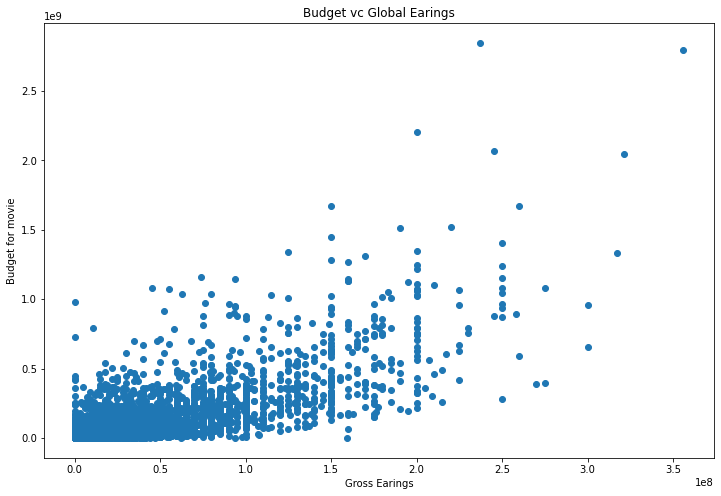

In [7]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vc Global Earings')
plt.xlabel('Gross Earings')
plt.ylabel('Budget for movie')
plt.show()

Text(0, 0.5, 'Budget for movie')

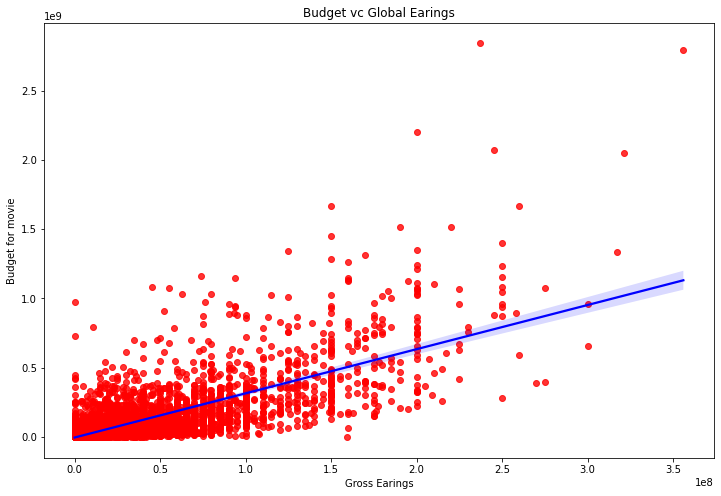

In [8]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('Budget vc Global Earings')
plt.xlabel('Gross Earings')
plt.ylabel('Budget for movie')

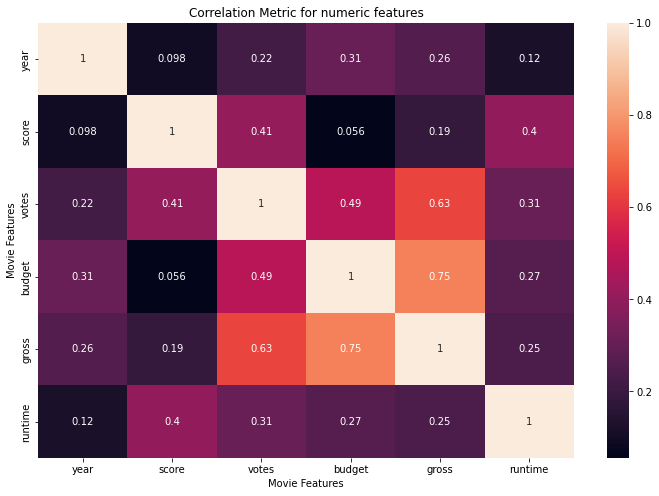

In [9]:
#let's start looking at correlation
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Metric for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [10]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0


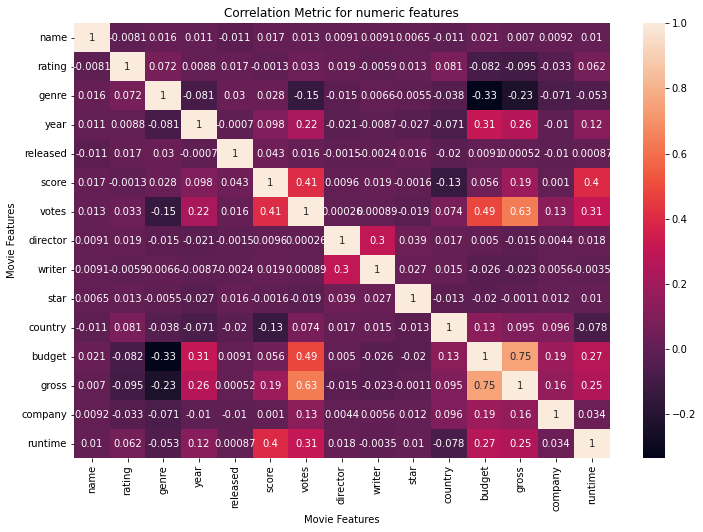

In [11]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Metric for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [13]:
#show features with the higher correlation
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[((sorted_pairs) > 0.5) &((sorted_pairs) < 1)]
high_corr

gross   votes     0.632834
votes   gross     0.632834
budget  gross     0.750157
gross   budget    0.750157
dtype: float64

<b>We see highest correlation between gross and budget.</b>

<b>Also between gross and votes</b>